# Packages

In [1]:
import sys
import csv
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import numpy as np
import random
from nakamoto.sector import CustomSector
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import token distributions

In [84]:
leaderboard_df = pd.read_excel(r'/Users/manos/Documents/Publications/DeFi Governance Decentralization/Data/comp_leaderboard_cleared.xlsx')
leaderboard_df_new = pd.read_excel(r'/Users/manos/Documents/Publications/DeFi Governance Decentralization/Data/comp_leaderboard_jun_cleared.xlsx')

In [3]:
leaderboard_df

,address_id,address_name,votes,vote_weight,proposals_voted,address_oc
0,1,A16z,321052.3281,11.54,14,Venture Capital
1,2,Polychain Capital,305968.4186,11.00,5,Venture Capital
2,3,Bain Capital Ventures,256761.4607,9.23,1,Venture Capital
3,4,Gauntlet,126139.8185,4.54,39,Financial Modeling
4,5,Paradigm,111086.1889,3.99,5,Hedge Fund
...,...,...,...,...,...,...
95,96,0xfc07...4682,13.3219,0.00,2,Unknown
96,97,0x915c...5019,12.6796,0.00,0,Unknown
97,98,Ryan Adams,12.5799,0.00,7,Individual
98,99,0x6e0e...504a,11.7523,0.00,0,Unknown


(array([72., 15.,  5.,  5.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([1.09796000e+01, 3.21151144e+04, 6.42192493e+04, 9.63233841e+04,
        1.28427519e+05, 1.60531654e+05, 1.92635789e+05, 2.24739924e+05,
        2.56844058e+05, 2.88948193e+05, 3.21052328e+05]),
 <BarContainer object of 10 artists>)

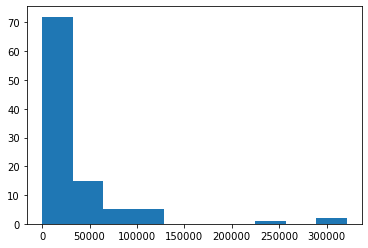

In [4]:
plt.hist(leaderboard_df.votes)

In [100]:
top_10 = []
top_list = []

for i in range(0,10):
    top_10.append(leaderboard_df.address_name[i])
    top_list.append(leaderboard_df.vote_weight[i])

print(top_10,top_list, sum(top_list))

['A16z', 'Polychain Capital', 'Bain Capital Ventures', 'Gauntlet', 'Paradigm', 'Robert Leshner', 'Geoffrey Hayes', 'Blck', 'MonetSupply', '0x6dd7...c7b5'] [11.54, 11.0, 9.23, 4.54, 3.99, 3.78, 3.63, 3.6, 2.79, 2.7] 56.80000000000001


In [101]:
top_10_jun = []
top_list_jun = []

for i in range(0,10):
    top_10_jun.append(leaderboard_df_new.address_name[i])
    top_list_jun.append(leaderboard_df_new.vote_weight[i])

print(top_10,top_list_jun, sum(top_list_jun))

['A16z', 'Polychain Capital', 'Bain Capital Ventures', 'Gauntlet', 'Paradigm', 'Robert Leshner', 'Geoffrey Hayes', 'Blck', 'MonetSupply', '0x6dd7...c7b5'] [11.61, 11.05, 9.27, 4.01, 3.79, 3.65, 3.61, 3.16, 2.71, 2.71] 55.56999999999999


### Governance token distribution

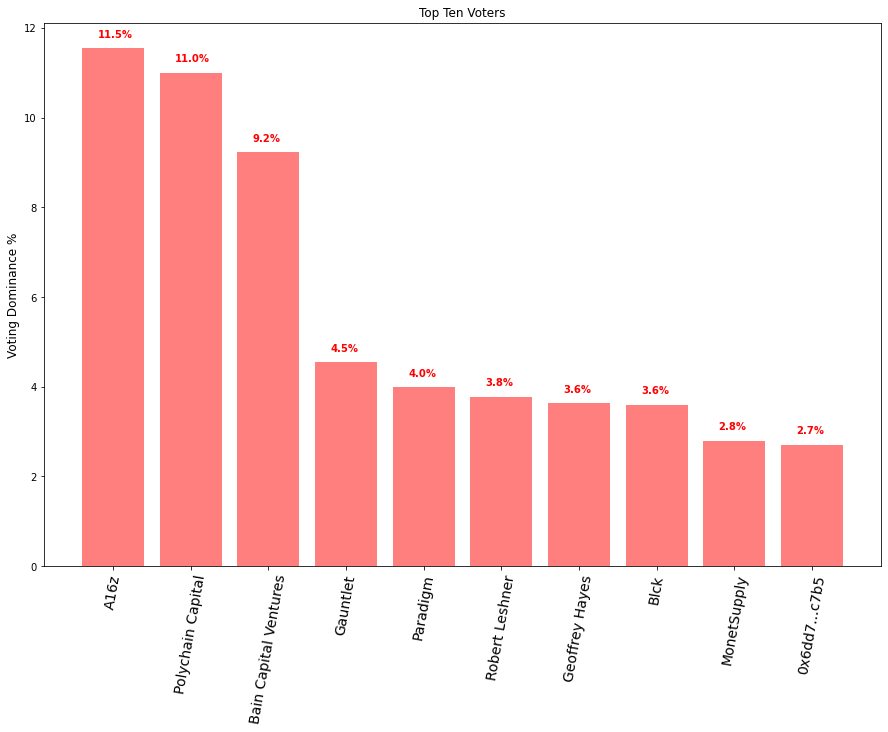

In [6]:
fig, ax = plt.subplots()
plt.bar(top_10, top_list, align='center', alpha=0.5,color="red")
plt.xticks(top_10, top_10, fontsize=14, rotation=80)
plt.ylabel('Voting Dominance %',fontsize=12)
plt.title('Top Ten Voters', fontsize=12)
for i, v in enumerate(top_list):
    percentage = '{:.1f}%'.format(v)
    plt.text(i -0.20, v +0.25, str(percentage), color='red', fontweight='bold')
fig.set_size_inches(15,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/top_ten.png', dpi=100)
plt.show()

In [102]:
top_labels = []
top_lables_jun =[]
for i in top_list:
    top_labels.append(str(i)+" %")
for i in top_list_jun:
    top_lables_jun.append(str(i)+" %")


In [131]:
fig = go.Figure(data=[
    go.Bar(name='Top Ten Voters August 2021', x=top_10, y=top_list, text = top_labels),
    go.Bar(name='Top Ten Voters Junuary 2022', x=top_10_jun, y=top_list_jun, text = top_lables_jun, marker_color= '#2ca02c')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### Occupation Labeling

August 2021

In [7]:
ind =[]
for i in leaderboard_df.address_oc:
    if i not in ind:
        ind.append(i)
print(ind)

['Venture Capital', 'Financial Modeling', 'Hedge Fund', 'Founder', 'Unknown ', 'Individual', 'DApp', 'University', 'Smart Contract', 'Staff']


In [8]:
#ind = ["Venture Capital","Financial Modeling","Hedge Fund","Founder","Unknown ","Individual","University",'Smart Contract',"DApp", "Staff"]
absolute_occ = []
weighed_occ = []

#distinct occupations
cnt1 = 0
for i in ind:
    for j in leaderboard_df.address_oc:
        if i == j:
            cnt1 = cnt1 + 1
    absolute_occ.append(cnt1)
    cnt1 = 0

print(absolute_occ)

#voting power per occupation
cnt2 = 0
for i in ind:
    for j in range(0,len(leaderboard_df.address_oc)):
        if i == leaderboard_df.address_oc[j]:
            cnt2 = cnt2 + leaderboard_df.votes[j]
    weighed_occ.append(cnt2)
    cnt2 = 0
print(weighed_occ)

[7, 1, 2, 3, 52, 10, 10, 7, 3, 5]
[948415.2333999999, 126139.8185, 174392.5884, 206142.1886, 497925.71819999994, 177541.48020000002, 213086.82919999998, 350005.53740000003, 40448.189300000005, 46443.996999999996]


Junuary 2022

In [70]:
ind_jun =[]
for i in leaderboard_df_new.address_oc:
    if i not in ind_jun:
        ind_jun.append(i)
print(ind_jun)

['Venture Capital', 'Hedge Fund', 'Founder', 'Financial Modeling', 'Unknown ', 'Non-profit organization', 'Individual', 'Crypto-Company', 'DApp', 'University', 'Index', 'Smart Contract', 'Staff']


In [71]:
#ind = ["Venture Capital","Financial Modeling","Hedge Fund","Founder","Unknown ","Individual","University",'Smart Contract',"DApp", "Staff"]
absolute_occ_jun = []
weighed_occ_jun = []

#distinct occupations
cnt1 = 0
for i in ind_jun:
    for j in leaderboard_df_new.address_oc:
        if i == j:
            cnt1 = cnt1 + 1
    absolute_occ_jun.append(cnt1)
    cnt1 = 0

print(absolute_occ_jun)

#voting power per occupation
cnt2 = 0
for i in ind:
    for j in range(0,len(leaderboard_df_new.address_oc)):
        if i == leaderboard_df_new.address_oc[j]:
            cnt2 = cnt2 + leaderboard_df_new.votes[j]
    weighed_occ_jun.append(cnt2)
    cnt2 = 0
print(weighed_occ)

[10, 2, 2, 2, 53, 2, 7, 2, 8, 6, 1, 1, 4]
[948415.2333999999, 126139.8185, 174392.5884, 206142.1886, 497925.71819999994, 177541.48020000002, 213086.82919999998, 350005.53740000003, 40448.189300000005, 46443.996999999996]


### Visualisation

In [79]:

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=ind, values= absolute_occ, name="Voters Demographics Distribution August 2021"),
              1, 1)
fig.add_trace(go.Pie(labels=ind_jun, values= absolute_occ_jun, name="Voters Demographics Distribution Junuary 2022"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Voters Demographics Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='August 2021', x=0.18, y=0.5, font_size=12, showarrow=False),
                 dict(text='Junuary 2022', x=0.825, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [81]:

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=ind, values= weighed_occ, name="Weighed Voters Demographics Distribution August 2021"),
              1, 1)
fig.add_trace(go.Pie(labels=ind_jun, values= weighed_occ_jun, name="Weighed Voters Demographics Distribution Junuary 2022"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Weighed Voters Demographics Distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='August 2021', x=0.178, y=0.5, font_size=12, showarrow=False),
                 dict(text='Junuary 2022', x=0.825, y=0.5, font_size=12, showarrow=False)])
fig.show()

### Visualisation

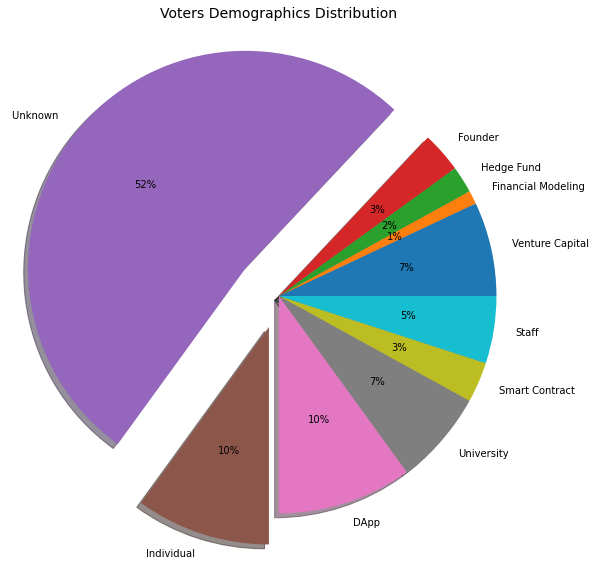

In [9]:
#pie_df = pd.DataFrame({'distinct' :  absolute_occ},{'voting' : weighed_occ})
y = np.array(absolute_occ)
x = np.array(weighed_occ)
explode = [0, 0, 0, 0, 0.2, 0.15, 0,0,0,0]
plt.pie(y, labels = ind, shadow=True, explode=explode,autopct='%1.0f%%')
plt.title('Voters Demographics Distribution', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/pie_dist.png', dpi=300)
plt.show()


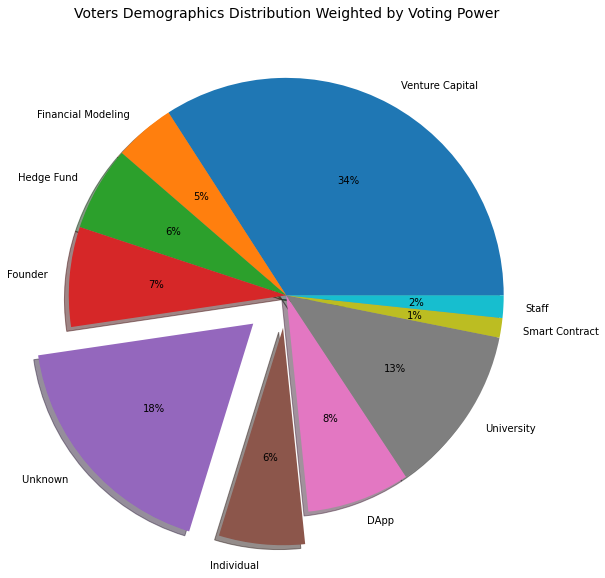

In [10]:
plt.pie(x, labels = ind, shadow=True, explode=explode,autopct='%1.0f%%')
fig = plt.gcf()
plt.title('Voters Demographics Distribution Weighted by Voting Power', fontsize=14)
fig.set_size_inches(10,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/pie_voting.png', dpi=300)
plt.show()

# Voting data import

In [12]:
all_data = pd.DataFrame()
all_data = []
for f in sorted(glob.glob("/Users/manos/Documents/Publications/DeFi Governance Decentralization/Data/Votes/*.xlsx")):
    #print(f)
    df = pd.read_excel(f)
    all_data.append(df)

for i in range(0,len(all_data)):
    all_data[i] = all_data[i].rename(columns={'for': 'for_'})

In [13]:
all_data[31]

,for_,for_votes,against,against_votes,for_acc,against_acc,for_total,against_total,proposed_by,result
0,0x2f04...7718,117893.5067,Polychain Capital,325747.8417,25.0,27.0,212952.0,681290.0,0x2f04...7718,failed
1,InstaDApp,50012.2914,Blck,100081.1188,NaN,NaN,NaN,NaN,NaN,NaN
2,DeFi Pulse Index,17478.0373,Dharma,100019.9154,NaN,NaN,NaN,NaN,NaN,NaN
3,DeFi Rate,10019.3244,Argent,50000.6124,NaN,NaN,NaN,NaN,NaN,NaN
4,Kain | Synthetix,10010.6773,Kyber Network,25007.1289,NaN,NaN,NaN,NaN,NaN,NaN
5,MonetSupply,7515.0748,Dakeshi,20000.1291,NaN,NaN,NaN,NaN,NaN,NaN
6,0x65b9...F782,11.7346,Pantera Capital,15000.0807,NaN,NaN,NaN,NaN,NaN,NaN
7,0x0d59...Ebd5,5.2388,PoolTogether Core Team,15000.0000,NaN,NaN,NaN,NaN,NaN,NaN
8,0xe8d8...3f31,1.7273,Calvin Liu,9041.0711,NaN,NaN,NaN,NaN,NaN,NaN
9,0xb9fd...D382,1.5597,ConsenSys,8000.9735,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
votes = ['adresses']
for i in range(1,57):
    if i <10 :
        x = str(0)+str(0)+str(str(i))
        votes.append(x)
    else:
        x = str(0)+str(str(i))
        votes.append(x)
print(votes)

['adresses', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056']


In [15]:
df = pd.DataFrame(columns = votes)

# Data Labeling

### Data types conversion

In [16]:
len(all_data)
def vote(j,i):
    for k in all_data[j].for_.loc[all_data[j]['for_'].isin([leaderboard_df.address_name[i]])]:
            if leaderboard_df.address_name[i] == k:
                return "for"
    for w in all_data[j].against.loc[all_data[j]['against'].isin([leaderboard_df.address_name[i]])]:
            if leaderboard_df.address_name[i] == w:
                return "against"

In [17]:
for i in range(0,len(leaderboard_df)):
    x = [str(leaderboard_df.address_name[i])]
    for j in range(0,len(all_data)):
        if vote(j,i)=="for":
            x.append(int(1))
        elif vote(j,i)=="against":
            x.append(int(-1))
        else:
            x.append(int(0))
    df.loc[i] = x
    
for i in df.drop(['adresses'], axis=1).columns:
     df[str(i)] = df[str(i)].astype(str).astype(int)
df.info()          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   adresses  100 non-null    object
 1   001       100 non-null    int64 
 2   002       100 non-null    int64 
 3   003       100 non-null    int64 
 4   004       100 non-null    int64 
 5   005       100 non-null    int64 
 6   006       100 non-null    int64 
 7   007       100 non-null    int64 
 8   008       100 non-null    int64 
 9   009       100 non-null    int64 
 10  010       100 non-null    int64 
 11  011       100 non-null    int64 
 12  012       100 non-null    int64 
 13  013       100 non-null    int64 
 14  014       100 non-null    int64 
 15  015       100 non-null    int64 
 16  016       100 non-null    int64 
 17  017       100 non-null    int64 
 18  018       100 non-null    int64 
 19  019       100 non-null    int64 
 20  020       100 non-null    int64 
 21  021       100 non

In [18]:
df.head()

,adresses,001,002,003,004,005,006,007,008,009,...,047,048,049,050,051,052,053,054,055,056
0,A16z,0,0,0,0,0,0,0,1,1,...,1,0,1,1,0,1,1,1,0,1
1,Polychain Capital,1,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,1,0,1
2,Bain Capital Ventures,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gauntlet,1,0,0,1,1,1,1,1,-1,...,1,0,1,0,1,1,1,1,0,1
4,Paradigm,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transposing

In [19]:
df1 = df.transpose()
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header #set the header row as the df header
#df1.drop(columns=['adresses'])
df1.head()

adresses,A16z,Polychain Capital,Bain Capital Ventures,Gauntlet,Paradigm,Robert Leshner,Geoffrey Hayes,Blck,MonetSupply,0x6dd7...c7b5,...,0xa47d...5127,0x622c...0c62,0x1090...a940,Robert Leshner,0xfc63...1fd8,0xfc07...4682,0x915c...5019,Ryan Adams,0x6e0e...504a,PowerIndex by PowerPool
001,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,-1,0,0
002,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
003,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
004,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
005,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Correlations

In [20]:
corr = df1[::10].corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


/Users/manos/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.

/Users/manos/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.



[]

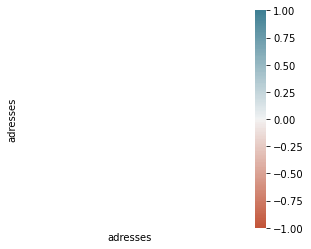

In [21]:
# corr_data = df.set_index('adresses')

corr = df1[::10].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)



## Dropping columns

In [22]:
for i in df.drop(['adresses'], axis=1).columns:
     df[str(i)] = df[str(i)].astype(str).astype(int)
    
# df['adresses'] = (df['adresses'])

In [23]:
df1.to_excel("/Users/manos/Documents/Publications/DeFi Governance Decentralization/Data/data_votings_transposed_mac.xlsx")

In [24]:
for i in df1.columns:
     df1[str(i)] = df1[str(i)].astype(str).astype(int)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 001 to 056
Data columns (total 100 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   A16z                                                       56 non-null     int64
 1   Polychain Capital                                          56 non-null     int64
 2   Bain Capital Ventures                                      56 non-null     int64
 3   Gauntlet                                                   56 non-null     int64
 4   Paradigm                                                   56 non-null     int64
 5   Robert Leshner                                             56 non-null     int64
 6   Geoffrey Hayes                                             56 non-null     int64
 7   Blck                                                       56 non-null     int64
 8   MonetSupply                      

In [25]:
def vote_result(j):
    for k in all_data[j].result[0]:
            if 'passed' == k:
                return int(1)
    for w in all_data[j].against.loc[all_data[j]['against'].isin([leaderboard_df.address_name[i]])]:
            if 'failed' == w or 'canceled' == w:
                return int(0)

In [26]:
sum(all_data[0].for_votes)

797981.28

# Voting Results

In [27]:
results = []
sum_votes = []
cnt2 = 0

for i in range(0,len(all_data)):
    if all_data[i].result[0] not in results:
        results.append(all_data[i].result[0])
print(results)

for i in range(0,len(results)):
    for j in range(0,len(all_data)):
        if results[i] == all_data[j].result[0]:
            cnt2 = cnt2 + 1
    sum_votes.append(cnt2)
    cnt2 = 0

print(sum_votes)

['passed', 'failed', 'canceled']
[48, 4, 4]


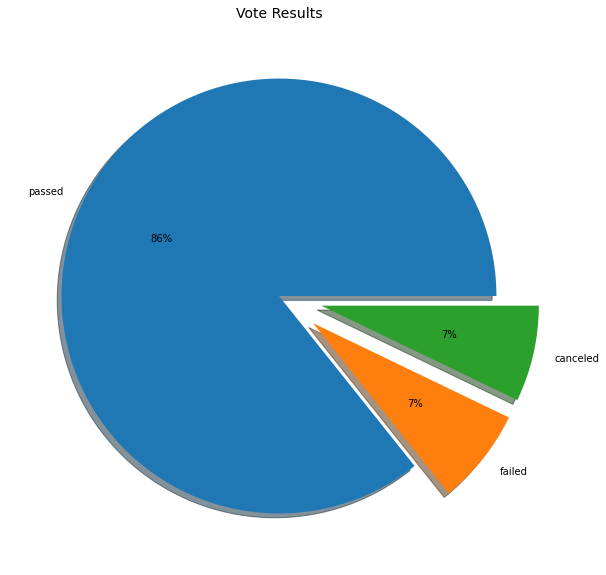

In [28]:
x = np.array(sum_votes)
explode = [0, 0.2, 0.2]
plt.pie(x, labels = results, shadow=True, explode=explode,autopct='%1.0f%%')
fig = plt.gcf()
plt.title('Vote Results', fontsize=14)
fig.set_size_inches(10,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/pie_results.png', dpi=300)
plt.show()

# Proposals Distribution

In [29]:
proposals = []
sum_proposals = []
cnt3 = 0

for i in range(0,len(all_data)):
    if all_data[i].proposed_by[0] not in proposals:
        proposals.append(all_data[i].proposed_by[0])
print(proposals)

for i in range(0,len(proposals)):
    for j in range(0,len(all_data)):
        if proposals[i] == all_data[j].proposed_by[0]:
            cnt3 = cnt3 + 1
    sum_proposals.append(cnt3)
    cnt3 = 0

print(sum_proposals)

['Geoffrey Hayes', 'Dharma', 'Blck', 'Compound Labs', 'Alameda Research', 'Gauntlet', '0xdb9f...1580', '0x14ee...85b4', '0x2f04...7718', '0x05c5...00bb', '0xd122...186a', '0x3ddf...5296', '0x4ca7...801e', 'Robert Leshner', 'Polychain Capital', 'MonetSupply', 'Getty Hill']
[8, 5, 19, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2]


In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

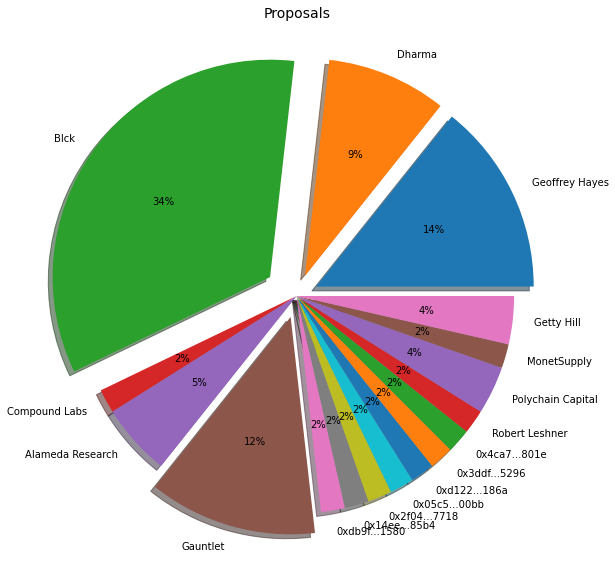

In [30]:
x = np.array(sum_proposals)
explode = [0.1, 0.1, 0.15, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(x, labels = proposals, shadow=True, explode=explode,autopct='%1.0f%%')
fig = plt.gcf()
plt.title('Proposals', fontsize=14)
fig.set_size_inches(10,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/pie_proposals.png', dpi=300)
plt.show()

In [31]:
all_data[0].for_total[0]

797981.0

# For voting top ten dominance

In [32]:
vote_for_avg = [0,0,0,0,0,0,0,0,0,0]
vote_again_avg = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(all_data)):
    for j in range(0,10):
        if not i == 47 and not i == 54:
            vote_for_avg[j] = vote_for_avg[j]+(all_data[i].for_votes[j]/all_data[i].for_total[0])
            #vote_again_avg[j] = vote_again_avg[j]+(all_data[i].against_votes[j]/all_data[i].against_total[0])
print(vote_for_avg,sum(vote_for_avg)/len(vote_for_avg))
#print(vote_again_avg)

[15.52070633619236, 9.927623757945165, 6.589779553831587, 5.063306883035945, 3.8368342139720486, 2.9153841038717605, 1.9934820328955976, 1.5077531319653543, 1.2740376296130553, 1.075407005499708] 4.970431464882257


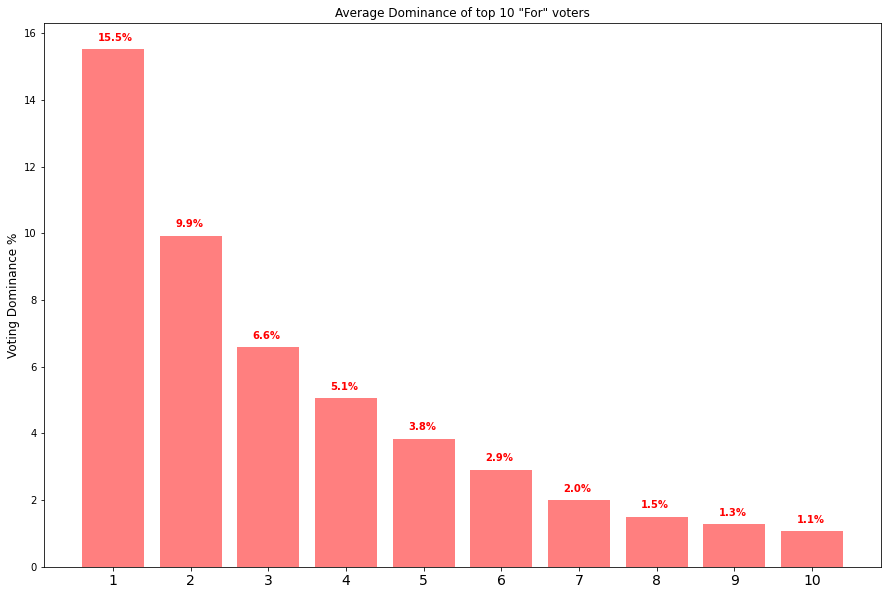

In [33]:
z = list(range(1,11))
fig, ax = plt.subplots()
plt.bar(z, vote_for_avg, align='center', alpha=0.5,color="red")
plt.xticks(z, z, fontsize=14)
plt.ylabel('Voting Dominance %',fontsize=12)
plt.title('Average Dominance of top 10 "For" voters', fontsize=12)
for i, v in enumerate(vote_for_avg):
    percentage = '{:.1f}%'.format(v)
    plt.text(i+0.8, v +0.25, str(percentage), color='red', fontweight='bold')
fig.set_size_inches(15,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/top_ten_for_votes.png', dpi=300)
plt.show()

In [34]:
vote_for_avg = [0,0,0,0,0,0,0,0,0,0]
vote_again_avg = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(all_data)):
    for j in range(0,10):
        if not i == 47 and not i == 54:
            vote_for_avg[j] = vote_for_avg[j]+(all_data[i].for_votes[j]/all_data[i].for_total[0])
            #vote_again_avg[j] = vote_again_avg[j]+(all_data[i].against_votes[j]/all_data[i].against_total[0])
print(vote_for_avg,sum(vote_for_avg)/len(vote_for_avg))
#print(vote_again_avg)

[15.52070633619236, 9.927623757945165, 6.589779553831587, 5.063306883035945, 3.8368342139720486, 2.9153841038717605, 1.9934820328955976, 1.5077531319653543, 1.2740376296130553, 1.075407005499708] 4.970431464882257


In [35]:
z = list(range(1,11))
print(z)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [36]:
for i in range(0,len(all_data)):
    for j in range(0,10):
        if not i == 47 and not i == 54:
            all_data[i].for_votes[j]/all_data[i].for_total[0]
            

In [37]:
all_data[31].for_votes[9]/all_data[31].for_total[0]

7.324185731995943e-06

# Top ten probability of voting success

In [38]:
count_for = []
total_for_votes = []
for j in range(0,len(top_10)):
    cnt = 0
    cnt2 = 0
    for i in range(0,len(all_data)):
        for z in all_data[i].for_:
            if not i == 47 and not i == 54:
                if top_10[j] == z:
                    cnt = cnt + 1
                    if all_data[i].result[0] == "passed":
                        cnt2 = cnt2 + 1
    total_for_votes.append(cnt)
    count_for.append(cnt2)

prop_for = []  
for i in range(0,10):
    if total_for_votes[i] != 0:
        prop_for.append((count_for[i]/total_for_votes[i])*100)
    else:
        prop_for.append(0)

In [39]:
print(prop_for)

[100.0, 100.0, 100.0, 94.44444444444444, 100.0, 96.875, 100.0, 97.72727272727273, 89.47368421052632, 0]


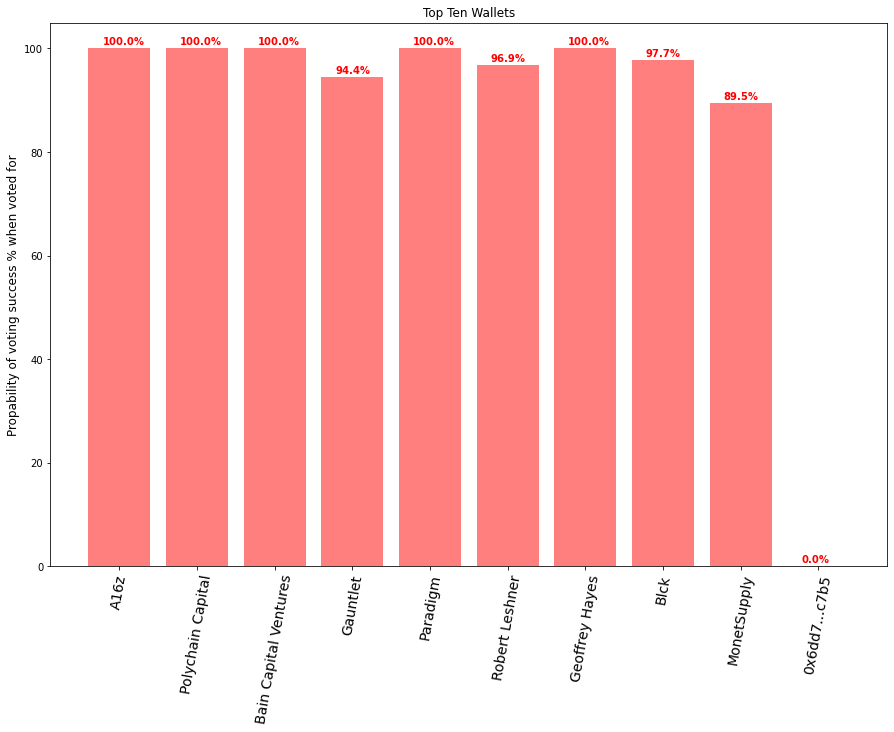

In [40]:
fig, ax = plt.subplots()
plt.bar(top_10, prop_for, align='center', alpha=0.5,color="red")
plt.xticks(top_10, top_10, fontsize=14, rotation=80)
plt.ylabel('Propability of voting success % when voted for',fontsize=12)
plt.title('Top Ten Wallets', fontsize=12)
for i, v in enumerate(prop_for):
    percentage = '{:.1f}%'.format(v)
    plt.text(i -0.22, v +0.7, str(percentage), color='red', fontweight='bold')
fig.set_size_inches(15,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/top_ten_for_votes_prob.png', dpi=300)
plt.show()

In [119]:
fig = go.Figure(data=[go.Bar(
            x= top_10, y=prop_for,
            text= prop_for,
            textposition='auto',
        )])

fig.show()

# Top ten against propability success

In [41]:
count_against = []
total_against_votes = []
for j in range(0,len(top_10)):
    cnt = 0
    cnt2 = 0
    for i in range(0,len(all_data)):
        for z in all_data[i].against:
            if not i == 47 and not i == 54:
                if top_10[j] == z:
                    cnt = cnt + 1
                    if all_data[i].result[0] == "failed":
                        cnt2 = cnt2 + 1
    total_against_votes.append(cnt)
    count_against.append(cnt2)

prop_against = []  
for i in range(0,10):
    if total_against_votes[i] != 0:
        prop_against.append((count_against[i]/total_against_votes[i])*100)
    else:
        prop_against.append(0)

In [42]:
print(prop_against, count_against, total_against_votes)

[0, 50.0, 0, 33.33333333333333, 50.0, 66.66666666666666, 50.0, 42.857142857142854, 25.0, 0] [0, 1, 0, 1, 1, 2, 1, 3, 1, 0] [0, 2, 0, 3, 2, 3, 2, 7, 4, 0]


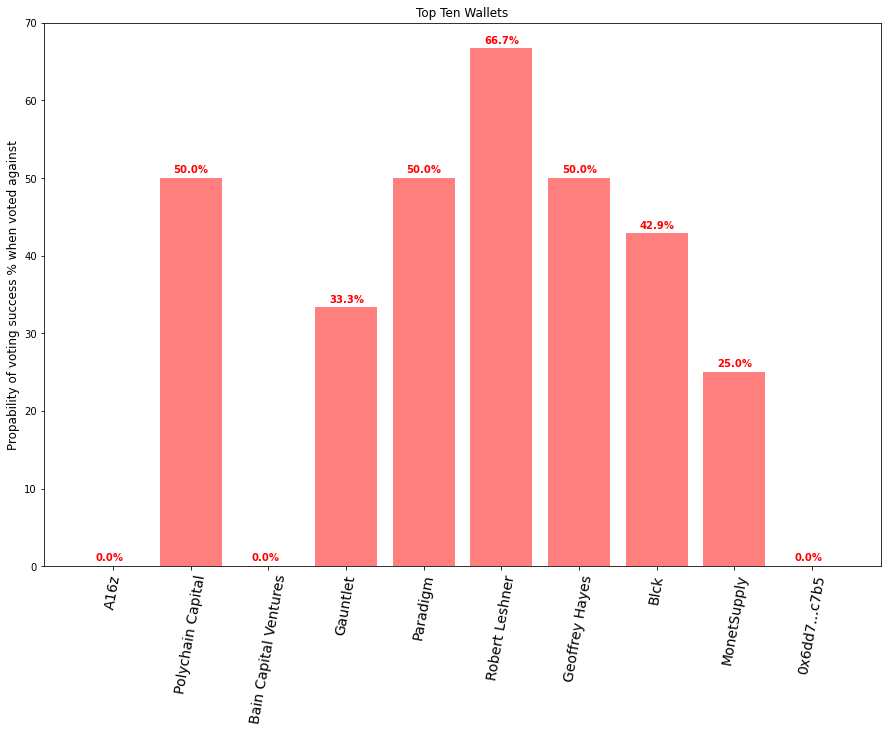

In [43]:
fig, ax = plt.subplots()
plt.bar(top_10, prop_against, align='center', alpha=0.5,color="red")
plt.xticks(top_10, top_10, fontsize=14, rotation=80)
plt.ylabel('Propability of voting success % when voted against',fontsize=12)
plt.title('Top Ten Wallets', fontsize=12)
for i, v in enumerate(prop_against):
    percentage = '{:.1f}%'.format(v)
    plt.text(i -0.22, v +0.7, str(percentage), color='red', fontweight='bold')
fig.set_size_inches(15,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/top_ten_against_votes_prob.png', dpi=300)
plt.show()

# Combined voting success propability

In [44]:
count_ = []
total_votes = []
for j in range(0,len(top_10)):
    cnt = 0
    cnt2 = 0
    for i in range(0,len(all_data)):
        for z in all_data[i].for_:
            if not i == 47 and not i == 54:
                if top_10[j] == z:
                    cnt = cnt + 1
                    if all_data[i].result[0] == "passed":
                        cnt2 = cnt2 + 1
        for z in all_data[i].against:
            if not i == 47 and not i == 54:
                if top_10[j] == z:
                    cnt = cnt + 1
                    if all_data[i].result[0] == "failed":
                        cnt2 = cnt2 + 1
    total_votes.append(cnt)
    count_.append(cnt2)

prop_ = []  
for i in range(0,10):
    if total_votes[i] != 0:
        prop_.append((count_[i]/total_votes[i])*100)
    else:
        prop_.append(0)

In [45]:
print(prop_, total_votes, count_)

[100.0, 96.0, 100.0, 89.74358974358975, 80.0, 94.28571428571428, 93.75, 90.19607843137256, 83.33333333333334, 0] [17, 25, 1, 39, 5, 35, 16, 51, 42, 0] [17, 24, 1, 35, 4, 33, 15, 46, 35, 0]


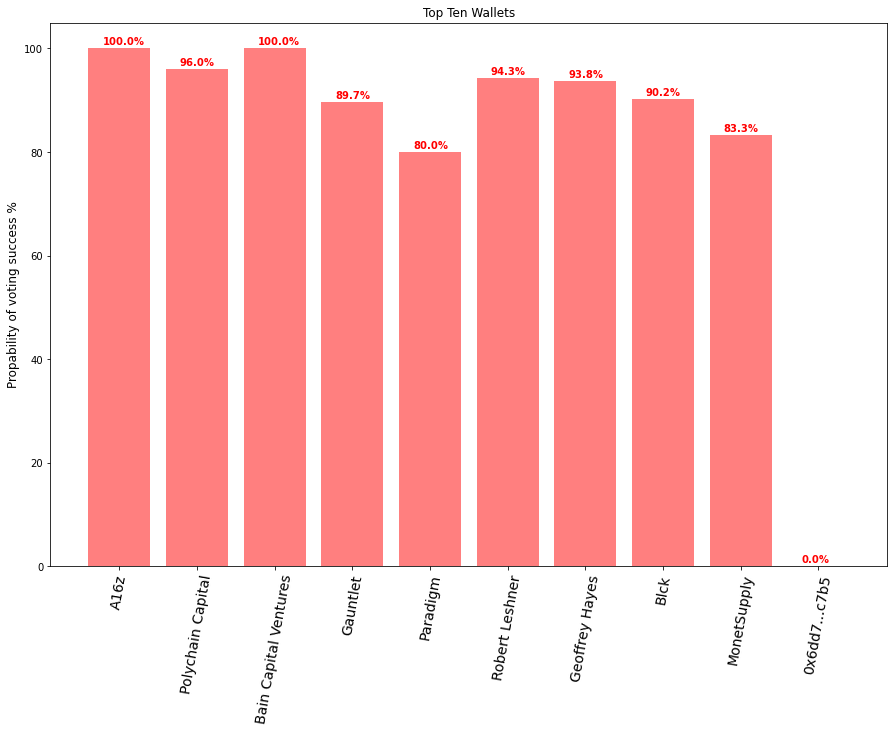

In [46]:
fig, ax = plt.subplots()
plt.bar(top_10, prop_, align='center', alpha=0.5,color="red")
plt.xticks(top_10, top_10, fontsize=14, rotation=80)
plt.ylabel('Propability of voting success %',fontsize=12)
plt.title('Top Ten Wallets', fontsize=12)
for i, v in enumerate(prop_):
    percentage = '{:.1f}%'.format(v)
    plt.text(i -0.22, v +0.7, str(percentage), color='red', fontweight='bold')
fig.set_size_inches(15,10)
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/top_ten_votes_prob.png', dpi=300)
plt.show()

In [123]:
prop_labels = []
prop_labels_for =[]
prop_labels_against =[]
for i in prop_:
    prop_labels.append(str("{:.2f}".format(i))+" %")
for i in prop_for:
    prop_labels_for.append(str("{:.2f}".format(i))+" %")
for i in prop_against:
    prop_labels_against.append(str("{:.2f}".format(i))+" %")


In [130]:
fig = go.Figure(data=[
    go.Bar(name='Propability of voting success %', x=top_10, y=prop_, text = prop_labels),
    go.Bar(name='Propability of voting success % when voted for', x=top_10, y=prop_for, text = prop_labels_for,  marker_color= '#2ca02c'),
    go.Bar(name='Propability of voting success % when voted against', x=top_10, y=prop_against, text = prop_labels_against,  marker_color= '#ff7f0e')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Hierarchical Clustering using dendogram from scipy

In [47]:
df1.columns

Index(['A16z', 'Polychain Capital', 'Bain Capital Ventures', 'Gauntlet',
       'Paradigm', 'Robert Leshner', 'Geoffrey Hayes', 'Blck', 'MonetSupply',
       '0x6dd7...c7b5', '0x590f...d954', 'Getty Hill', '0x3e41...c049',
       'Pantera Capital', 'Dharma', 'InstaDApp', 'Blockchain at UCLA',
       'Blockchain at Berkeley', 'Argent', 'Stanford Blockchain Club',
       'Blockchain at MIT', 'Blockchain at Michigan', 'Blockchain at Columbia',
       'Penn Blockchain ', '0x10f8...1f92', '0x3ddf...5296',
       'Set WBTC Collateral Factor to 75%', '0xa118...e5db',
       'Dragonfly Capital', 'Kyber Network', 'IDEO CoLab Ventures',
       'Polychain Capital', 'Jared Flatow', 'PoolTogether Core Team',
       'Dakeshi', '0xd681...7d6e', 'Jayson Hobby', 'DeFi Rate',
       'Kain | Synthetix', 'Max Wolff', 'ConsenSys', '0xa0dc...c432', 'Arr00',
       '0x582c...d468', '0xeeb4...fddf', 'TennisBowling', 'Paul Veradittakit',
       'Ric Burton', 'John Doh', '0x5274...59d2', 'Calvin Liu', 'RAC',
  

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1)

array([8, 4, 4, 4, 4, 4, 4, 5, 2, 5, 4, 0, 0, 2, 4, 6, 1, 1, 1, 1, 0, 1,
       1, 6, 1, 1, 1, 9, 1, 1, 1, 7, 1, 1, 1, 9, 3, 9, 0, 3, 9, 3, 3, 3,
       8, 8, 3, 0, 3, 3, 9, 3, 3, 3, 0, 3])

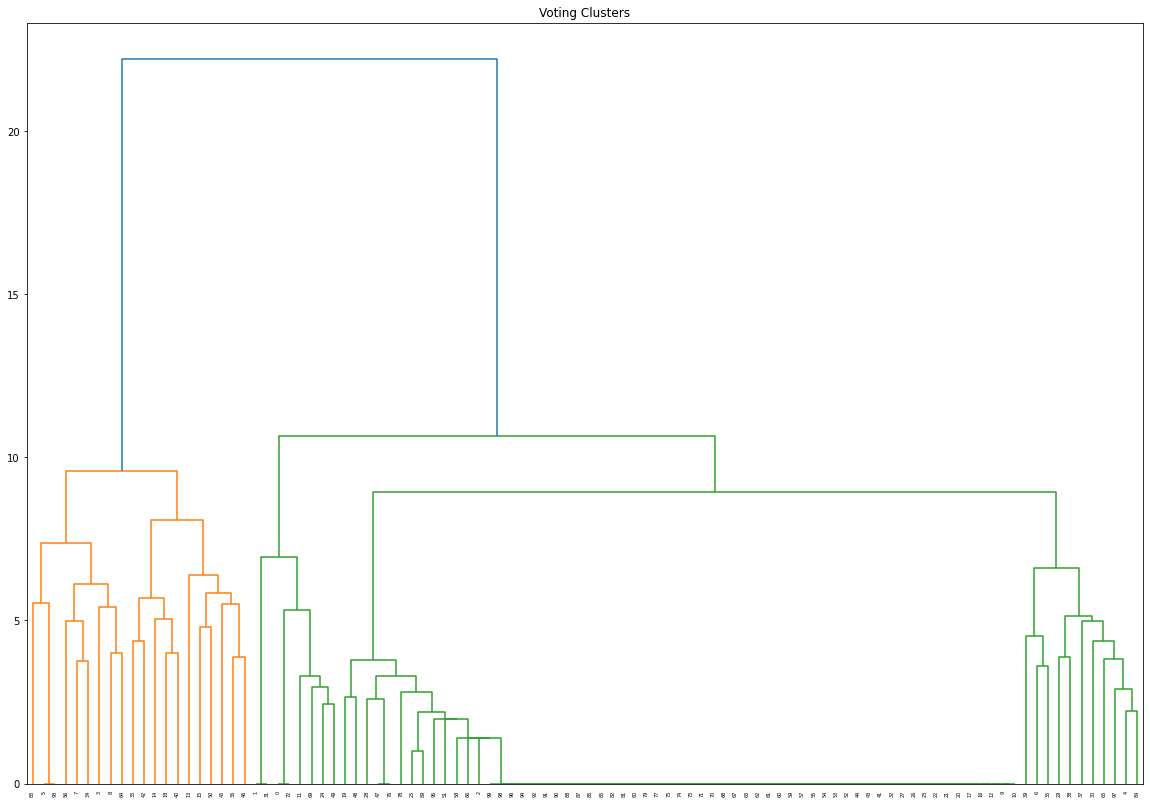

In [50]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 14))
plt.title("Voting Clusters")
dend = shc.dendrogram(shc.linkage(df.loc[:, df.columns != 'adresses'], method='ward'))
plt.savefig(r'/Users/manos/Library/Mobile Documents/com~apple~CloudDocs/UNIC/Publications/DeFi Governance Decentralization/Charts/voting_clusters.png', dpi=300)

# Metrics

## Gini

In [51]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g



In [52]:
leaderboard_votes = leaderboard_df["votes"].to_numpy()
print(type(leaderboard_df["votes"]))
norm = np.linalg.norm(leaderboard_votes)
normal_array = (leaderboard_votes/norm)
leaderboard_votes = leaderboard_votes[::-1] #assenting order

<class 'pandas.core.series.Series'>


In [107]:
leaderboard_votes_new = leaderboard_df_new["votes"].to_numpy()
print(type(leaderboard_df_new["votes"]))
norm = np.linalg.norm(leaderboard_votes_new)
normal_array = (leaderboard_votes_new/norm)
leaderboard_votes_new = leaderboard_votes_new[::-1] #assenting order

<class 'pandas.core.series.Series'>


In [109]:
print("The Gini Coefficient for August 2021 is ", gini(leaderboard_votes), " and for Junuary 2022 is ", gini(leaderboard_votes_new))

The Gini Coefficient for August 2021 is  0.7643389636694919  and for Junuary 2022 is  0.7532293496278482


In [54]:
#df[str(i)] = df[str(i)].astype(str).astype(int)
gini(normal_array)

0.7643389636694919

In [55]:
leaderboard_df.head()

,address_id,address_name,votes,vote_weight,proposals_voted,address_oc
0,1,A16z,321052.3281,11.54,14,Venture Capital
1,2,Polychain Capital,305968.4186,11.00,5,Venture Capital
2,3,Bain Capital Ventures,256761.4607,9.23,1,Venture Capital
3,4,Gauntlet,126139.8185,4.54,39,Financial Modeling
4,5,Paradigm,111086.1889,3.99,5,Hedge Fund


### Gini for all votes

In [56]:
votes_ = []
for j in range(0,len(top_10)):
    for i in range(0,len(all_data)):
        for z in all_data[i].for_votes:
            if not i == 47 and not i == 54:
                votes_.append(z)

In [57]:
votes_arr = np.array(votes_)

In [58]:
array_sum = np.sum(votes_arr)
array_has_nan = np.isnan(array_sum)

print("This array has nan values: ", array_has_nan, np.count_nonzero(np.isnan(votes_arr)))

This array has nan values:  True 20


In [59]:
votes_arr = votes_arr[np.logical_not(np.isnan(votes_arr))] #removing 20 nan values

In [60]:
votes_arr = votes_arr[::-1]/100

In [61]:
gini(votes_arr)

0.8627833337186973

### Nagamoto package and Lorenz ploting

In [62]:
nakamoto_config = {
    'plot_notebook': True,
    'plot_image_path': "image.png"
}

### For top 100 leaderboard

In [113]:
custom_sector = CustomSector(leaderboard_votes, 
                 'Leaderboard Voting Power August 2021', 
                 '',
                 **nakamoto_config)

In [114]:
nagamoto = custom_sector.get_nakamoto_coefficient()
print(nagamoto)

8


In [115]:
plot = custom_sector.get_plot()

In [116]:
custom_sector = CustomSector(leaderboard_votes_new, 
                 'Leaderboard Voting Power Junuary 2022', 
                 '',
                 **nakamoto_config)

In [117]:
nagamoto = custom_sector.get_nakamoto_coefficient()
print(nagamoto)

8


In [118]:
plot = custom_sector.get_plot()

### Average Nagamoto Coefficient for all past proposals

In [66]:
count_ = []
count_gini = []
for i in range(0,len(all_data)):
    if all_data[i].result[0] == "passed":
        threshold = 0
        votes_cnt = 0
        nagamoto_cnt = 0
        for z in all_data[i].for_votes:
            if not i == 47 and not i == 54:
                if threshold < 0.51:
                    votes_cnt = votes_cnt + z
                    threshold = votes_cnt/all_data[i].for_total[0]
                    nagamoto_cnt = nagamoto_cnt + 1
        count_.append(nagamoto_cnt)
        v = np.array(all_data[i].for_votes)
        v = v[np.logical_not(np.isnan(v))]
        count_gini.append(gini(v)) #Getting also the Gini Coefficients


    elif all_data[i].result[0] == "failed":
        threshold = 0
        votes_cnt = 0
        nagamoto_cnt = 0
        for z in all_data[i].against_votes:
            if not i == 47 and not i == 54:
                if threshold < 0.51:
                    votes_cnt = votes_cnt + z
                    threshold = votes_cnt/all_data[i].against_total[0]
                    nagamoto_cnt = nagamoto_cnt + 1
        count_.append(nagamoto_cnt)
        v = np.array(all_data[i].against_votes)
        v = v[np.logical_not(np.isnan(v))]
        count_gini.append(gini(v)) #Getting also the Gini Coefficients


Gini

In [67]:
print("The average is: ",sum(count_gini)/len(count_gini),"With Standard Deviation of: ", np.std(count_gini))

The average is:  0.7974846675608304 With Standard Deviation of:  0.12106586820995123


Nagamoto

In [68]:
print("The average is: ",sum(count_)/len(count_),"With Standard Deviation of: ", np.std(count_))

The average is:  3.076923076923077 With Standard Deviation of:  0.9166442529086912


In [ ]:
no_proposals = []
for i in range(0,len(count_)):
    no_proposals.append(i)


In [ ]:

df = pd.DataFrame(dict(
    Nagamoto_Coefficient = count_,
    Proposals = no_proposals,
    Gini_Coefficient = count_gini
    
))
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(x=no_proposals, y=count_, name="Nagamoto Coefficient"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=no_proposals, y=count_gini, name="Gini Coefficient"),
    secondary_y=True,
)


fig.update_layout(
    title_text='Nagamoto and Gini Coefficient Over the Proposals'
)

# Set x-axis title
fig.update_xaxes(title_text="Proposals")

# Set y-axes titles
fig.update_yaxes(title_text="Nagamono Coefficint", secondary_y=False)
fig.update_yaxes(title_text="Gini Coefficient", secondary_y=True)

fig.show()

## Lorenz Curves

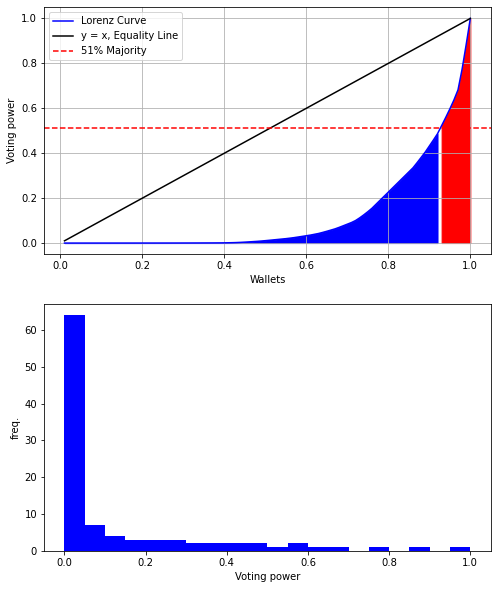

In [ ]:
#'G1'Sorted in ascending order
df = leaderboard_df.sort_values(by=['votes'])
#'Ct'Add a numeric column called
df['Ct']=np.arange(1,len(df)+1)

#Substitute a numeric sequence for x
x = df['Ct']
#Substitute the cumulative value of G1 data for y
y = df['votes'].cumsum()
#Graph drawing
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))
#x,Standardize with the maximum value of y and draw with a blue line
ax1.plot(x/max(x),y/max(y),'blue', label='Lorenz Curve')
ax1.fill_between(x/max(x), y/max(y), where=y/max(y)<=0.51, color='blue')
ax1.fill_between(x/max(x), y/max(y), where=y/max(y)>0.51, color='red')
#As a uniform distribution, y=x graph drawing
ax1.plot(x/max(x),x/max(x),'black', label = 'y = x, Equality Line')
ax1.axhline(y=0.51, color='r', linestyle='--', label = '51% Majority')
#Draw frequency distribution on ax2 (Because Grade is 20 levels, binz=20）
ax2.hist(y/max(y), bins = 20, range =(0,1),label ='Lorenz Curve', color = 'blue')

ax1.set_xlabel('Wallets')
ax1.set_ylabel('Voting power')
ax2.set_ylabel('freq.')
ax2.set_xlabel('Voting power')
ax1.legend()
ax1.grid(True)
plt.show()